# Transportation 
### By Benediktus Darrel Djunaidi

Transportation includes all modes of transport that individuals use to travel from one place to another. Without it, transport may be impossible in select neighborhoods which makes it impossible for the public to commute for: daily activities such as work, school, buying groceries, and other important things.

In particular, **work** is something that is essential in today's world; businesses can only operate if we have people who can commute and work. Hence, I have chosen **transportation** as a submetric to determining the best Pittsburgh neighborhood(s).

For the most part, the difficulty of selecting a metric is from the *availability of data*. In order to analyze data of neighborhoods and determine the winner(s), the dataset must have a field that includes the names of the neighborhoods, otherwise it would be impossible to relate any neighborhood to any data values. It was difficult trying to find a dataset which included reasonable metrics that is fully (or at least, mostly) complete.

To get started, we should initialize the dataset.

In [2]:
import pandas as pd
df = pd.read_csv("transportation.csv", index_col="_id")
df.head(5)

,Neighborhood,Sector #,Population (2010),Miles of Major Roads,Total Street Miles,Street Density (st. mi/area sq. mi),# Sets of Steps,# Step Treads,Res. Permit Parking Area(s),Total Working Pop. (Age 16+) (2010),Commute to Work: Drive Alone (2010),Commute to Work: Carpool/Vanpool (2010),Commute to Work: Public Transportation (2010),Commute to Work: Taxi (2010),Commute to Work: Motorcycle (2010),Commute to Work: Bicycle (2010),Commute to Work: Walk (2010),Commute to Work: Other (2010),Work at Home (2010)
_id,,,,,,,,,,,,,,,,,,,
1,Allegheny Center,3,933,2.232425,4.141467,19.721273,0,0,None,386,0.277202,0.098446,0.168394,0.000000,0.000000,0.0,0.437824,0.000000,0.018135
2,Allegheny West,3,462,1.471627,4.870843,34.544983,0,0,G,151,0.231788,0.205298,0.158940,0.145695,0.000000,0.0,0.258278,0.000000,0.000000
3,Allentown,6,2500,1.648451,12.325689,41.781996,12,474,None,824,0.469660,0.109223,0.379854,0.000000,0.008495,0.0,0.000000,0.014563,0.018204
4,Arlington,7,1869,0.861571,10.734269,22.838871,13,428,None,673,0.739970,0.072808,0.135215,0.000000,0.000000,0.0,0.019316,0.008915,0.023774
5,Arlington Heights,7,244,0.000000,1.086460,8.230760,0,0,None,72,0.111111,0.000000,0.888889,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


We find that some of the information in this dataset is not so important, so we will filter some data out.

In [3]:
#Since "Commute to Work: ..." takes so long to write, assign variables for each.
twp = "Total Working Pop. (Age 16+) (2010)"
d = "Commute to Work: Drive Alone (2010)"
c = "Commute to Work: Carpool/Vanpool (2010)"
p = "Commute to Work: Public Transportation (2010)"
t = "Commute to Work: Taxi (2010)"
m = "Commute to Work: Motorcycle (2010)"
b = "Commute to Work: Bicycle (2010)"
w = "Commute to Work: Walk (2010)"
o = "Commute to Work: Other (2010)"
h = "Work at Home (2010)"

#Filtered data
filter1 = df[["Neighborhood", twp, d, c, t, p, m, b, w, o, h]]
filter1.head()

,Neighborhood,Total Working Pop. (Age 16+) (2010),Commute to Work: Drive Alone (2010),Commute to Work: Carpool/Vanpool (2010),Commute to Work: Taxi (2010),Commute to Work: Public Transportation (2010),Commute to Work: Motorcycle (2010),Commute to Work: Bicycle (2010),Commute to Work: Walk (2010),Commute to Work: Other (2010),Work at Home (2010)
_id,,,,,,,,,,,
1,Allegheny Center,386,0.277202,0.098446,0.000000,0.168394,0.000000,0.0,0.437824,0.000000,0.018135
2,Allegheny West,151,0.231788,0.205298,0.145695,0.158940,0.000000,0.0,0.258278,0.000000,0.000000
3,Allentown,824,0.469660,0.109223,0.000000,0.379854,0.008495,0.0,0.000000,0.014563,0.018204
4,Arlington,673,0.739970,0.072808,0.000000,0.135215,0.000000,0.0,0.019316,0.008915,0.023774
5,Arlington Heights,72,0.111111,0.000000,0.000000,0.888889,0.000000,0.0,0.000000,0.000000,0.000000


### Analysis At A Surface Level
To begin, 
I will analyze the "best" neighborhoods solely by:
- Public Transportation
- Use of cars (Drive Alone + Carpool/Vanpool + Taxi)

The "best" neighborhood from only public transportation:

In [4]:
filter2 = df[['Neighborhood', twp, p]]
filter2[filter2[p] == filter2[p].max()]

,Neighborhood,Total Working Pop. (Age 16+) (2010),Commute to Work: Public Transportation (2010)
_id,,,
5,Arlington Heights,72,0.888889


The "best" neighborhood from only the use of cars:

In [5]:
df['Use of cars'] = df[d] + df[c] + df[t]
filter3 = df[["Neighborhood", twp, d, c, t, 'Use of cars']]
filter3[filter3['Use of cars'] == filter3['Use of cars'].max()]

,Neighborhood,Total Working Pop. (Age 16+) (2010),Commute to Work: Drive Alone (2010),Commute to Work: Carpool/Vanpool (2010),Commute to Work: Taxi (2010),Use of cars
_id,,,,,,
27,East Carnegie,86,1.000000,0.000000,0.0,1.0
38,Hays,166,0.819277,0.180723,0.0,1.0


### Compilations and Results
- From only public transportation: **Arlington Heights** is the best neighborhood in Pittsburgh, since it has the most public transportation, which indicates the accessibility of its modes of transport to the general public regardless of class and status.
- From only cars: **East Carnegie** and **Hays** are the best neighborhoods in Pittsburgh with 100% use of cars, which may indicate that the entire neighborhood has access to anywhere around town.

However, this is not determinant of the fact that **Arlington Heights**, **East Carnegie** and **Hays** would be the best neighborhood in Pittsburgh, due to a couple of reasons.

## Problems
We cannot simply determine the best neighborhood in Pittsburgh from commuter data alone, since there are a multitude of underlying factors when it comes to analyzing the best neighborhood, such as:
- Preference - people may prefer using cars more than using other modes of transport, such as bicycling and walking.
- Population - there could be less population in a neighborhood, therefore skewing the measurements to become better than they would be in real terms (when compared to other neighborhoods by making up for the population difference).
- Natural Environment - environmental factors in a seemingly "good" neighborhood may be comparatively worse to a neighborhood with "worse" records of commuter data.

### Measurement
There are a lot more reasons why this data alone will not suffice. So, to make up for the possible inaccuracies in decision-making, we will create **the ultimate measurement**, using the current data, to determine the quality of a neighborhood. Since the data we have is very limited, I chose three fields to be incorporated that I think are the most definitive of the "best" neighborhood: **total working population**, **use of cars**, and **use of public transportation**.

Therefore, the formula of the measurement that I came up with is as such:

$M = \frac{C + 1.25T}{2}\times\frac{P}{H}$

where $M$ = measure, $C$ = use of cars, $T$ = use of public transportation, $P$ = total working population, and $H$ = highest total working population in the dataset.

The bigger $M$ is, the "better" the neighborhood will be.

#### Derivation
*Note: clearly, this is an unprofessional, largely intuition-based approach on creating the formula without any efforts to explore the relationships of such factors in the real world. Therefore, this is only an estimation and may be absolutely inaccurate.*

**Public transportation** and the **use of cars** are important and significant in determining the "best" Pittsburgh neighborhood. However, since public transport is more accessible to the less fortunate as opposed to cars, I attached a 1.25 multiplier to emphasize its significance, while taking the average of both to compute a single number for comparability.

**Population** also affects the degree to which a neighborhood is the "best". If there is less population, the possibility of a neighborhood ranking higher than another may be more frequent, as there would be less occurrences of factors that degrade a neighborhood's quality, vice versa. In order to create a fair playing ground among all neighborhoods with varying population sizes, I included the ratio of the total working population and the highest total working population in the dataset. This in turn should create a more equal field among the rest as this creates a nature of direct proportionality where a smaller population size would be met with a lower measurement figure.

### Analysis With A Better Measurement

In [10]:
#Find the highest total working population in the dataset
H = df[twp].max()
C = df['Use of cars']
T = df[p]
df['M'] = round((C + 1.25*T)/2*(df[twp]/H), 2)
ff = df[['Neighborhood', twp, 'Use of cars', p, 'M']]
ff = ff.sort_values(by='M', ascending=False)

To put this into visualisation with a plot:

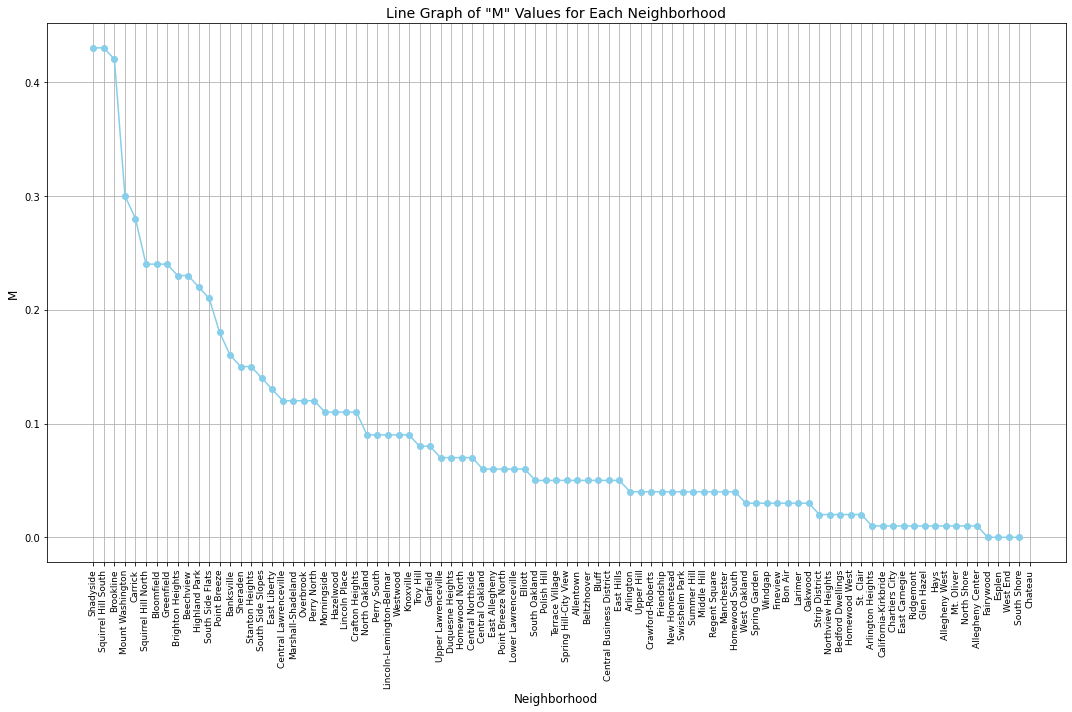

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(ff['Neighborhood'], ff['M'], marker='o', color='skyblue', linestyle='-')
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('M', fontsize=12)
plt.title('Line Graph of meas Values for Each Neighborhood', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusion

In the case of **transportation**, we can see that **Shadyside** is the "best" Pittsburgh neighborhood. However, to find the absolute "best" neighborhood in Pittsburgh is certainly not an easy task, especially with data derived solely from a dataset of numbers. Additionally, there are a lot of external factors which can skew the absolute positioning of a neighborhood's rank among the others. Hence, even with the improved measurement derived by using data from only this dataset, there is still the possibility of having inaccuracies. Therefore, we hope that combining these results with the other submetrics' results will increase its precision.